# loading libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# loading dataset


In [2]:
data=pd.read_csv("dataset2.csv")

In [3]:
data

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


# understanding the data


In [4]:
data.shape

(10000, 50)

In [5]:
data.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

In [6]:
data.info

<bound method DataFrame.info of          id  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0         1        3               1          5         72        0   
1         2        3               1          3        144        0   
2         3        3               1          2         58        0   
3         4        3               1          6         79        1   
4         5        3               0          4         46        0   
...     ...      ...             ...        ...        ...      ...   
9995   9996        3               1          1         50        0   
9996   9997        2               1          4         59        1   
9997   9998        2               1          4         57        0   
9998   9999        3               1          1         49        0   
9999  10000        3               1          2         52        3   

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  ...  \
0                     0         0            

In [7]:
data.isnull() 

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Data Visualization

# pre processing

In [8]:
le=preprocessing.LabelEncoder()
label=le.fit_transform(data["CLASS_LABEL"])
label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [9]:
data['CLASS_LABEL']=label
data

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [10]:
data.corr()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
id,1.000000,-0.238066,0.027976,-0.234909,-0.046967,0.231091,-0.107170,0.009916,-0.084148,0.024811,...,0.204099,-0.081004,0.000481,0.063732,-0.010836,-0.020932,-0.169502,-0.068570,0.465757,-0.866025
NumDots,-0.238066,1.000000,0.507992,0.079202,0.277380,-0.198769,0.093034,0.011425,0.109508,0.038068,...,-0.117210,0.045291,-0.012244,-0.343927,-0.151756,0.047821,0.032276,0.035586,-0.153835,0.294111
SubdomainLevel,0.027976,0.507992,1.000000,0.007277,0.098579,-0.050018,0.246368,-0.005845,0.009518,-0.023593,...,-0.001061,0.026432,-0.008830,-0.679687,-0.086943,0.059584,-0.030790,0.093623,-0.034866,0.043132
PathLevel,-0.234909,0.079202,0.007277,1.000000,0.390456,0.090503,0.027626,-0.005891,0.127291,0.015719,...,0.000701,-0.027880,-0.002279,-0.024815,-0.399710,-0.000903,0.040901,0.064222,-0.095786,0.229450
UrlLength,-0.046967,0.277380,0.098579,0.390456,1.000000,0.437313,0.111980,-0.003425,0.058233,0.350756,...,0.033192,-0.053222,-0.036766,-0.133533,-0.800096,0.002019,-0.025366,-0.000860,0.142819,-0.074493
NumDash,0.231091,-0.198769,-0.050018,0.090503,0.437313,1.000000,0.113200,-0.010139,-0.024395,-0.050195,...,0.228154,-0.064450,-0.006314,-0.023363,-0.468798,-0.137093,-0.085238,-0.122579,0.184808,-0.372235
NumDashInHostname,-0.107170,0.093034,0.246368,0.027626,0.111980,0.113200,1.000000,-0.004409,-0.018043,-0.035170,...,0.040743,-0.010096,-0.007712,-0.359595,-0.097446,0.079631,0.038776,0.070111,-0.113745,0.150444
AtSymbol,0.009916,0.011425,-0.005845,-0.005891,-0.003425,-0.010139,-0.004409,1.000000,-0.001996,-0.005023,...,-0.012422,-0.003160,-0.003067,0.003031,-0.007469,-0.006885,-0.004207,0.011307,0.013235,-0.017323
TildeSymbol,-0.084148,0.109508,0.009518,0.127291,0.058233,-0.024395,-0.018043,-0.001996,1.000000,-0.022361,...,-0.039905,-0.011051,-0.020400,0.016614,-0.036087,0.022478,0.022098,0.058519,-0.000144,0.095864
NumUnderscore,0.024811,0.038068,-0.023593,0.015719,0.350756,-0.050195,-0.035170,-0.005023,-0.022361,1.000000,...,-0.010341,-0.019348,-0.019467,0.003353,-0.257480,0.014952,-0.053835,-0.047775,0.100214,-0.098869


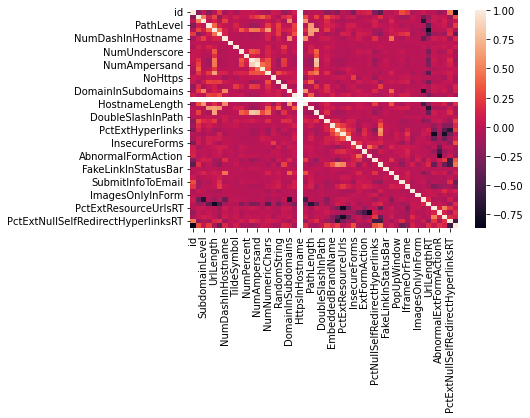

In [11]:
heat=sns.heatmap(data.corr())

In [12]:
x=data.iloc[:,1:49].values
y=data.iloc[:,49].values

In [13]:
print(x.shape)
print(y.shape)

(10000, 48)
(10000,)


# training and testing


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 48)
(3000, 48)
(7000,)
(3000,)


In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [17]:
ML_model=[]
Accuracy=[]
Recall=[]
Precision=[]
f1_Score=[]
times=[]
def storeres(model,a,b,c,d,t):
    ML_model.append(model)
    Accuracy.append(a)
    Recall.append(b)
    Precision.append(c)
    f1_Score.append(d)
    times.append(t)

In [18]:
start_time = time.time() 
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=42)
dtree.fit(x_train,y_train)
y_predict1=dtree.predict(x_test)
dtc_acc=accuracy_score(y_test,y_predict1)
dtc_recall=recall_score(y_test, y_predict1)
dtc_precision=precision_score(y_test,y_predict1)
dtc_f1_score=f1_score(y_test,y_predict1)
end_time = time.time()
decisiontree_time = end_time  - start_time

In [19]:
storeres('Decision Tree',dtc_acc,dtc_recall,dtc_precision,dtc_f1_score,decisiontree_time)
print('Decision Tree:',dtc_acc,dtc_recall,dtc_precision,dtc_f1_score)
print('Execution time for the decision tree:', decisiontree_time,'seconds')

Decision Tree: 0.8563333333333333 0.7430058555627846 0.969439728353141 0.8412523020257827
Execution time for the decision tree: 0.15439081192016602 seconds


In [20]:
start_time = time.time()
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion="entropy")
classifier.fit(x_train,y_train)
y_pred2=classifier.predict(x_test)
rfc_acc=accuracy_score(y_test,y_pred2)
rfc_recall=recall_score(y_test, y_pred2)
rfc_precision=precision_score(y_test,y_pred2)
rfc_f1_score=f1_score(y_test, y_pred2)
end_time = time.time()
randomforest_time = end_time - start_time


In [21]:
storeres('Random Forest',rfc_acc,rfc_recall,rfc_precision,rfc_f1_score,randomforest_time)
print('Execution time:', randomforest_time,'seconds')

Execution time: 0.0944974422454834 seconds


In [22]:
start_time = time.time()
from sklearn.naive_bayes import BernoulliNB
b_bayes=BernoulliNB()
b_bayes.fit(x_train,y_train)
y_pred3=b_bayes.predict(x_test)
NBC_acc=accuracy_score(y_test,y_pred3)
NBC_recall=recall_score(y_test, y_pred3)
NBC_precision=precision_score(y_test,y_pred3)
NBC_f1_score=f1_score(y_test, y_pred3)
end_time = time.time()
navibayes_time = end_time - start_time

In [23]:
storeres("Bernoulli-naive_bayes",NBC_acc,NBC_recall,NBC_precision,NBC_f1_score,navibayes_time)
print('Execution time:', navibayes_time,'seconds')

Execution time: 0.025232315063476562 seconds


In [24]:
start_time = time.time()
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)
y_pred4 = classifier.predict(x_test)
logi_acc=accuracy_score(y_test, y_pred4)
logi_recall=recall_score(y_test, y_pred4)
logi_precision=precision_score(y_test,y_pred4)
logi_f1_score=f1_score(y_test, y_pred4)
end_time = time.time()
logistic_time = end_time - start_time# In[ ]:



In [25]:
storeres("LogisticRegression",logi_acc,logi_recall,logi_precision,logi_f1_score,logistic_time)
print('Execution time:', logistic_time ,'seconds')

Execution time: 0.12324380874633789 seconds


In [26]:
start_time = time.time()
from sklearn.svm import SVC
svm=SVC(kernel='linear',C=1.0,random_state=42)
svm.fit(x_train,y_train)
y_pred5=svm.predict(x_test)
svm_acc=accuracy_score(y_test,y_pred5)
svm_recall=recall_score(y_test, y_pred5)
svm_precision=precision_score(y_test,y_pred5)
svm_f1_score=f1_score(y_test, y_pred5)
end_time = time.time()
svm_time = end_time - start_time



In [27]:
storeres("Support_Vector_Mechine",svm_acc,svm_recall,svm_precision,svm_f1_score,svm_time )
print('Execution time:',svm_time,'seconds')

Execution time: 0.9761977195739746 seconds


In [28]:
'''start_time = time.time()


error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1= knn.predict(x_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(x_test)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
end_time = time.time()
print(end_time-start_time)'''

'start_time = time.time()\n\n\nerror1= []\nerror2= []\nfor k in range(1,15):\n    knn= KNeighborsClassifier(n_neighbors=k)\n    knn.fit(x_train,y_train)\n    y_pred1= knn.predict(x_train)\n    error1.append(np.mean(y_train!= y_pred1))\n    y_pred2= knn.predict(x_test)\n    error2.append(np.mean(y_test!= y_pred2))\n# plt.figure(figsize(10,5))\nplt.plot(range(1,15),error1,label="train")\nplt.plot(range(1,15),error2,label="test")\nplt.xlabel(\'k Value\')\nplt.ylabel(\'Error\')\nplt.legend()\nend_time = time.time()\nprint(end_time-start_time)'

In [29]:
start_time = time.time()
from sklearn.neighbors import KNeighborsClassifier
neigh=KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)
#from sklearn import metrics
y_pred6=neigh.predict(x_test)
knn_acc=accuracy_score(y_test,y_pred6)
knn_recall=recall_score(y_test, y_pred6)
knn_precision=precision_score(y_test,y_pred6)
knn_f1_score=f1_score(y_test, y_pred6)
end_time = time.time()
knn_time = end_time - start_time


C:\Users\priya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [30]:
storeres("KNeighborsClassifier",knn_acc,knn_recall,knn_precision,knn_f1_score,knn_time)
print('Execution time:',knn_time ,'seconds')

Execution time: 0.48488688468933105 seconds


In [31]:
start_time = time.time()
from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier() 
gbt.fit(x_train,y_train)
y_pred7=gbt.predict(x_test)
gbt_acc=accuracy_score(y_test,y_pred7)
gbt_recall=recall_score(y_test, y_pred7)
gbt_precision=precision_score(y_test,y_pred7)
gbt_f1_score=f1_score(y_test, y_pred7)
end_time = time.time()
gb_time = end_time - start_time

In [32]:
storeres("GradientBoosting",gbt_acc,gbt_recall,gbt_precision,gbt_f1_score,gb_time)
print('Execution time:', gb_time ,'seconds')

Execution time: 2.687631607055664 seconds


In [33]:
start_time = time.time()
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier() 
hgb.fit(x_train,y_train)
y_pred8=hgb.predict(x_test)
hgb_acc=accuracy_score(y_test,y_pred8)
hgb_recall=recall_score(y_test, y_pred8)
hgb_precision=precision_score(y_test,y_pred8)
hgb_f1_score=f1_score(y_test, y_pred8)
end_time = time.time()
histgram_time = end_time -start_time


In [34]:
storeres("HistGradientBoosting",hgb_acc,hgb_recall,hgb_precision,hgb_f1_score,histgram_time)
print('Execution time:', histgram_time,'seconds')

Execution time: 4.314643144607544 seconds


In [35]:
start_time = time.time()
from lightgbm import LGBMClassifier
lgb = LGBMClassifier() 
lgb.fit(x_train,y_train)
y_pred9=lgb.predict(x_test)
lgb_acc=accuracy_score(y_test,y_pred9)
lgb_recall=recall_score(y_test, y_pred9)
lgb_precision=precision_score(y_test,y_pred9)
lgb_f1_score=f1_score(y_test, y_pred9)
end_time = time.time()
lgbm_time = end_time - start_time


In [36]:
storeres("LightGradientBoosting",lgb_acc,lgb_recall,lgb_precision,lgb_f1_score,lgbm_time)
print('Execution time:', lgbm_time ,'seconds')

Execution time: 3.3524434566497803 seconds


In [37]:
start_time = time.time()
from sklearn.ensemble import AdaBoostClassifier
Adamodel=AdaBoostClassifier(n_estimators=100,learning_rate=1)
model=Adamodel.fit(x_train,y_train)
y_pred10=model.predict(x_test)
adaboost_acc=accuracy_score(y_test,y_pred10)
adaboost_recall=recall_score(y_test, y_pred10)
adaboost_precision=precision_score(y_test,y_pred10)
adaboost_f1_score=f1_score(y_test, y_pred10)
end_time = time.time()
adaboost_time = end_time - start_time



In [38]:
storeres("AdaBoost",adaboost_acc,adaboost_recall,adaboost_precision,adaboost_f1_score,adaboost_time)
print('Execution time:', adaboost_time,'seconds')

Execution time: 2.4538145065307617 seconds


In [39]:
start_time = time.time()
from xgboost import XGBClassifier
xgb=XGBClassifier(learning_rate=0.4,max_depth=7)
xgb.fit(x_train,y_train)
y_pred11=xgb.predict(x_test)
xgboost_acc=accuracy_score(y_test,y_pred11)
xgboost_recall=recall_score(y_test, y_pred11)
xgboost_precision=precision_score(y_test,y_pred11)
xgboost_f1_score=f1_score(y_test, y_pred11)
end_time = time.time()
xgboost_time = end_time - start_time

In [40]:
storeres("XGBoost",xgboost_acc,xgboost_recall,xgboost_precision,xgboost_f1_score,xgboost_time)
print('Execution time:', xgboost_time,'seconds')

Execution time: 1.9949095249176025 seconds


In [41]:
result=pd.DataFrame({'ML_model':ML_model,'ACCURACY':Accuracy,'recall':Recall,'precision':Precision,'F1_score':f1_Score,'Time_excute/sec':times})# In[ ]:

In [42]:
result

,ML_model,ACCURACY,recall,precision,F1_score,Time_excute/sec
0,Decision Tree,0.856333,0.743006,0.969440,0.841252,0.154391
1,Random Forest,0.975333,0.964867,0.986693,0.975658,0.094497
2,Bernoulli-naive_bayes,0.884667,0.887443,0.887443,0.887443,0.025232
3,LogisticRegression,0.943000,0.947300,0.941785,0.944535,0.123244
4,Support_Vector_Mechine,0.945333,0.947300,0.946069,0.946684,0.976198
5,KNeighborsClassifier,0.949667,0.947951,0.953534,0.950734,0.484887
6,GradientBoosting,0.953000,0.922576,0.984722,0.952637,2.687632
7,HistGradientBoosting,0.909333,0.830189,0.991453,0.903683,4.314643
8,LightGradientBoosting,0.978333,0.968120,0.989362,0.978625,3.352443
9,AdaBoost,0.957000,0.934288,0.980874,0.957014,2.453815


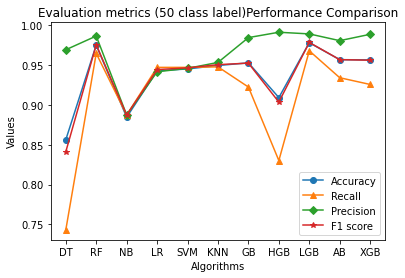

In [2]:
import matplotlib.pyplot as plt

# Data for algorithms
x_values = ["DT","RF","NB","LR","SVM","KNN","GB","HGB","LGB","AB","XGB"]
accuracy=[0.856333,
0.975333,
0.884667,
0.943000,
0.945333,
0.949667,
0.953000,
0.909333,
0.978333,
0.957000,
0.956667
]
recall= [0.743006,
0.964867,
0.887443,
0.947300,
0.947300,
0.947951,
0.922576,
0.830189,
0.968120,
0.934288,
0.925830,
]
precision= [0.969440,
0.986693,
0.887443,
0.941785,
0.946069,
0.953534,
0.984722,
0.991453,
0.989362,
0.980874,
0.988881,
]
f1_score=[0.841252,
0.975658,
0.887443,
0.944535,
0.946684,
0.950734,
0.952637,
0.903683,
0.978625,
0.957014,
0.956317
]
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data as lines
ax.plot(x_values, accuracy, label='Accuracy',marker="o")
ax.plot(x_values, recall, label='Recall',marker="^")
ax.plot(x_values, precision, label='Precision',marker="D")
ax.plot(x_values, f1_score, label='F1 score',marker="*")

# Add labels and legend
ax.set_xlabel('Algorithms')
ax.set_ylabel('Values')
ax.set_title('Evaluation metrics (50 class label)Performance Comparison')
ax.legend()

# Display the plot
plt.show()